# Optimizing Electric Vechile Charging Points Placement using Hybrid Quantum Genetic Algorithm

### Initialization

In [1]:
population_size = 20
num_new_charging_points = 5
selection_size = 5

# Bounds of the search space
X_MIN, X_MAX = -15, 15
Y_MIN, Y_MAX = -15, 15

### Generating random population

In [2]:
import random

def generate_random_coordinates(n):
    coordinates = [(random.uniform(X_MIN, X_MAX), random.uniform(Y_MIN, Y_MAX)) for _ in range(n)]
    return coordinates

In [3]:
existing_charging_points = generate_random_coordinates(5)
points_of_interest = generate_random_coordinates(10)
powergrids = [(0, 13), (-13, -2), (13, -2)]

print(existing_charging_points)
print(points_of_interest)
print(powergrids)

[(3.8615054460576346, -12.710327512540971), (2.0308864860939444, -11.113142132198963), (-11.335203306369074, -3.1265377432596537), (2.304104171628726, -7.205855973535444), (4.083607202041559, 1.3495210304100667)]
[(0.22211475763430144, -8.924649611993573), (-8.57009292811417, 7.839540895198311), (-0.7124019373176509, -3.5346532584829546), (-13.434044142900538, 6.005166609295127), (6.416315665254352, 14.989753182581893), (-1.0950747554883726, -4.0935356256754325), (-6.4336378015586515, 11.12639732921875), (9.99048860795006, -9.832837186708387), (-11.76321875362099, 0.8608823403951522), (3.6686332098795837, 14.560132370560616)]
[(0, 13), (-13, -2), (13, -2)]


### Plotting the population 

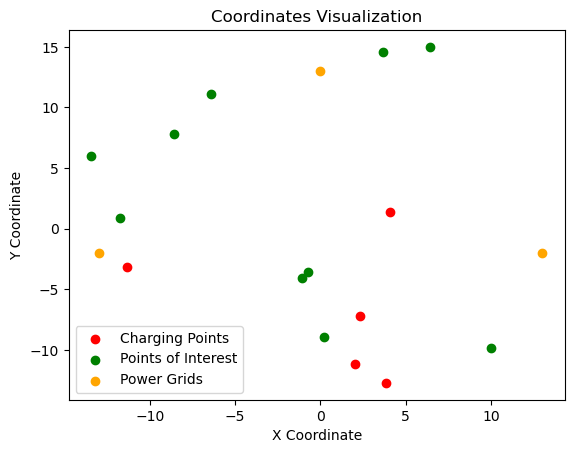

In [4]:
import matplotlib.pyplot as plt

charging_x, charging_y = zip(*existing_charging_points)
interest_x, interest_y = zip(*points_of_interest)
power_x, power_y = zip(*powergrids)

plt.scatter(charging_x, charging_y, color='red', label='Charging Points')
plt.scatter(interest_x, interest_y, color='green', label='Points of Interest')
plt.scatter(power_x, power_y, color='orange', label='Power Grids')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Coordinates Visualization')

plt.legend()

plt.show()

### Dividing the population into different possible grids

In [5]:
def divide_graph_into_parts(num_of_qubits_for_one_point, existing_charging_points, points_of_interest, powergrids, factor_power, save_grids=False, numbering=False):
    total_parts = 2 ** num_of_qubits_for_one_point

    if numbering:
        print(f"Graph #: {factor_power}")

    if num_of_qubits_for_one_point >= 3:
        factor1 = 2 ** factor_power
        factor2 = total_parts // factor1

        charging_x, charging_y = zip(*existing_charging_points)
        interest_x, interest_y = zip(*points_of_interest)
        power_x, power_y = zip(*powergrids)

        plt.scatter(charging_x, charging_y, color='red', alpha=0.7)
        plt.scatter(interest_x, interest_y, color='green', alpha=0.7)
        plt.scatter(power_x, power_y, color='orange', alpha=0.7)

        plt.xlim(X_MIN, X_MAX)
        plt.ylim(Y_MIN, Y_MAX)

        boundaries_dict = {}

        for i in range(factor1):
            for j in range(factor2):
                x_start = X_MIN + i * (X_MAX - X_MIN) / factor1
                x_end = X_MIN + (i + 1) * (X_MAX - X_MIN) / factor1
                y_start = Y_MIN + j * (Y_MAX - Y_MIN) / factor2
                y_end = Y_MIN + (j + 1) * (Y_MAX - Y_MIN) / factor2

                if save_grids:
                    grid_number = i * factor2 + j
                    adjacent_pairs = []

                    if i > 0:
                        adjacent_pairs.append((i - 1) * factor2 + j)
                    if i < factor1 - 1:
                        adjacent_pairs.append((i + 1) * factor2 + j)
                    if j > 0:
                        adjacent_pairs.append(i * factor2 + (j - 1))
                    if j < factor2 - 1:
                        adjacent_pairs.append(i * factor2 + (j + 1))
                    if i > 0 and j > 0:
                        adjacent_pairs.append((i - 1) * factor2 + (j - 1))
                    if i > 0 and j < factor2 - 1:
                        adjacent_pairs.append((i - 1) * factor2 + (j + 1))
                    if i < factor1 - 1 and j > 0:
                        adjacent_pairs.append((i + 1) * factor2 + (j - 1))
                    if i < factor1 - 1 and j < factor2 - 1:
                        adjacent_pairs.append((i + 1) * factor2 + (j + 1))

                    adjacent_pairs.sort()

                    boundaries_dict[grid_number] = {'x_start': x_start, 'x_end': x_end, 'y_start': y_start, 'y_end': y_end, 'adjacent_pairs': adjacent_pairs}

                plt.axhline(y=y_start, color='black', linestyle='--', linewidth=0.5)
                plt.axvline(x=x_start, color='black', linestyle='--', linewidth=0.5)
                plt.annotate(f'{i * factor2 + j}', ((x_start + x_end) / 2, (y_start + y_end) / 2),
                             ha='center', va='center', fontsize=8, color='red')

        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.title(f'Divided Graph into {total_parts} Equal Parts using {factor1} x {factor2} grid')

        plt.show()

    else:
        factor1, factor2 = 1, total_parts

        plt.scatter(*zip(*all_coordinates), color='blue', alpha=0.7)

        plt.xlim(X_MIN, X_MAX)
        plt.ylim(Y_MIN, Y_MAX)

        boundaries_dict = {}

        for i in range(factor1):
            for j in range(factor2):
                x_start = X_MIN + i * (X_MAX - X_MIN) / factor1
                x_end = X_MIN + (i + 1) * (X_MAX - X_MIN) / factor1
                y_start = Y_MIN + j * (Y_MAX - Y_MIN) / factor2
                y_end = Y_MIN + (j + 1) * (Y_MAX - Y_MIN) / factor2

                if save_grids:
                    grid_number = i * factor2 + j
                    adjacent_pairs = []

                    if j > 0:
                        adjacent_pairs.append(i * factor2 + (j - 1))
                    if j < factor2 - 1:
                        adjacent_pairs.append(i * factor2 + (j + 1))

                    boundaries_dict[grid_number] = {'x_start': x_start, 'x_end': x_end, 'y_start': y_start, 'y_end': y_end, 'adjacent_pairs': adjacent_pairs}

                plt.axhline(y=y_start, color='black', linestyle='--', linewidth=0.5)
                plt.axvline(x=x_start, color='black', linestyle='--', linewidth=0.5)
                plt.annotate(f'{i * factor2 + j}', ((x_start + x_end) / 2, (y_start + y_end) / 2),
                             ha='center', va='center', fontsize=8, color='red')

        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.title(f'Divided Graph into {total_parts} Equal Parts')

        plt.show()

    return boundaries_dict


In [6]:
from prettytable import PrettyTable

def display_boundaries_table(boundaries_dict, points_counts):
    if boundaries_dict is not None:
        table = PrettyTable()
        table.field_names = ["Grid Number", "X Start", "X End", "Y Start", "Y End", "Adjacent Pairs", "Existing Charging Points", "Points of Interest", "Power Grids"]

        for grid_number, boundary_info in boundaries_dict.items():
            charging_points = points_counts[grid_number]['charging_points']
            points_of_interest = points_counts[grid_number]['points_of_interest']
            powergrids = points_counts[grid_number]['powergrids']  # Assuming you have added 'power_grids' to the points_counts dictionary
            adjacent_pairs = ', '.join(map(str, boundary_info.get('adjacent_pairs', [])))

            table.add_row([grid_number, boundary_info['x_start'], boundary_info['x_end'], boundary_info['y_start'], boundary_info['y_end'],
                           adjacent_pairs, charging_points, points_of_interest, powergrids])

        print(table)
    else:
        print("No grid boundaries to display.")



def count_points_in_grids(existing_charging_points, points_of_interest, powergrids, boundaries_dict):
    grid_counts = {}

    for grid_number, boundaries in boundaries_dict.items():
        x_start, x_end, y_start, y_end = boundaries['x_start'], boundaries['x_end'], boundaries['y_start'], boundaries['y_end']

        charging_in_grid = sum(x_start <= x <= x_end and y_start <= y <= y_end for x, y in existing_charging_points)
        interest_in_grid = sum(x_start <= x <= x_end and y_start <= y <= y_end for x, y in points_of_interest)
        power_in_grid = sum(x_start <= x <= x_end and y_start <= y <= y_end for x, y in powergrids)

        grid_counts[grid_number] = {'charging_points': charging_in_grid, 'points_of_interest': interest_in_grid, 'powergrids': power_in_grid}

    return grid_counts


Graph #: 1


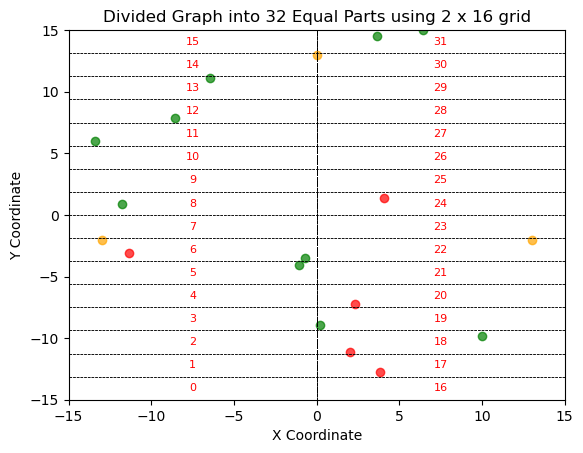

Graph #: 2


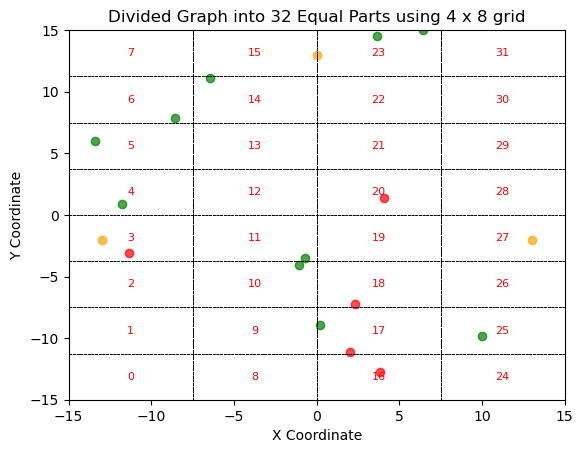

Graph #: 3


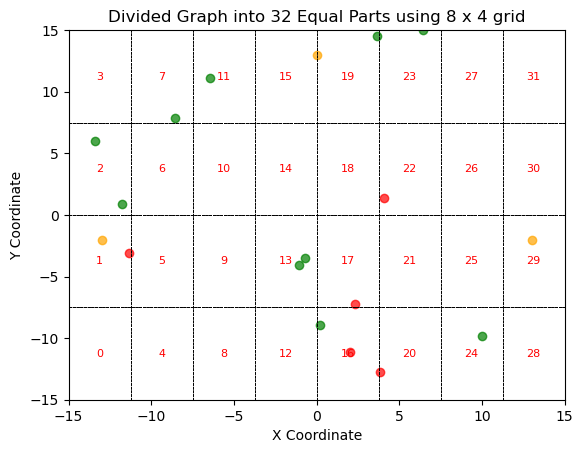

Graph #: 4


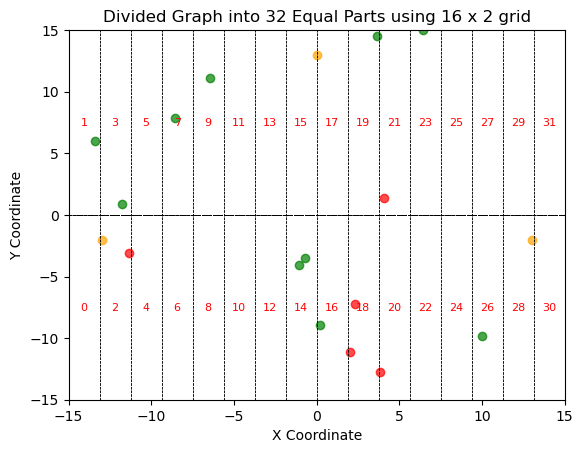

In [7]:
num_of_qubits_for_one_point = 5
for i in range(1, num_of_qubits_for_one_point):
    divide_graph_into_parts(num_of_qubits_for_one_point, existing_charging_points, points_of_interest, powergrids, i, numbering = True)

### Selecting the best Gird

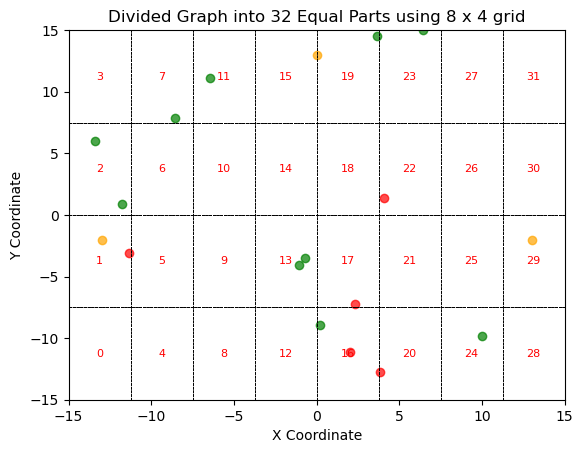

In [8]:
'''
The numbering starts from 1,2,3,..
'''
final_grid = 3

boundaries = {}

boundaries = divide_graph_into_parts(num_of_qubits_for_one_point, existing_charging_points, points_of_interest, powergrids, final_grid, save_grids=True)

### Extracting useful information from thefinal plot

In [9]:
points_counts = count_points_in_grids(existing_charging_points, points_of_interest, powergrids, boundaries)

display_boundaries_table(boundaries, points_counts)

+-------------+---------+--------+---------+-------+--------------------------------+--------------------------+--------------------+-------------+
| Grid Number | X Start | X End  | Y Start | Y End |         Adjacent Pairs         | Existing Charging Points | Points of Interest | Power Grids |
+-------------+---------+--------+---------+-------+--------------------------------+--------------------------+--------------------+-------------+
|      0      |  -15.0  | -11.25 |  -15.0  |  -7.5 |            1, 4, 5             |            0             |         0          |      0      |
|      1      |  -15.0  | -11.25 |   -7.5  |  0.0  |         0, 2, 4, 5, 6          |            1             |         0          |      1      |
|      2      |  -15.0  | -11.25 |   0.0   |  7.5  |         1, 3, 5, 6, 7          |            0             |         2          |      0      |
|      3      |  -15.0  | -11.25 |   7.5   |  15.0 |            2, 6, 7             |            0             |

In [10]:
def create_fitness_dict(boundaries_dict, points_counts):
    fitness_dict = {}

    for grid_number, boundary_info in boundaries_dict.items():
        charging_points = points_counts[grid_number]['charging_points']
        points_of_interest = points_counts[grid_number]['points_of_interest']
        powergrids = points_counts[grid_number]['powergrids']  # Assuming you have added 'power_grids' to the points_counts dictionary
        adjacent_pairs = []
        for _ in boundary_info.get('adjacent_pairs'):
            adjacent_pairs.append(_)

        fitness_dict[grid_number] = {'Adjacent_Pairs': adjacent_pairs, 'Charging Points': charging_points, 'Points of Interest': points_of_interest, 'Power Grids': powergrids}

    return fitness_dict


def display_fitness_table(fitness_dict):
    if fitness_dict:
        table = PrettyTable()
        table.field_names = ["Grid Number", "Adjacent Pairs", "Charging Points", "Points of Interest", "Power Grids"]

        for grid_number, fitness_info in fitness_dict.items():
            adjacent_pairs = ', '.join(map(str, fitness_info.get('Adjacent_Pairs', [])))
            charging_points = fitness_info['Charging Points']
            points_of_interest = fitness_info['Points of Interest']
            powergrids = fitness_info.get('Power Grids', 0)  # Assuming you have changed it to 'Power Grids' in the fitness dictionary

            table.add_row([grid_number, adjacent_pairs, charging_points, points_of_interest, powergrids])

        print(table)
    else:
        print("Summary dictionary is empty.")


In [11]:
fitness_dict = create_fitness_dict(boundaries, points_counts)

display_fitness_table(fitness_dict)

+-------------+--------------------------------+-----------------+--------------------+-------------+
| Grid Number |         Adjacent Pairs         | Charging Points | Points of Interest | Power Grids |
+-------------+--------------------------------+-----------------+--------------------+-------------+
|      0      |            1, 4, 5             |        0        |         0          |      0      |
|      1      |         0, 2, 4, 5, 6          |        1        |         0          |      1      |
|      2      |         1, 3, 5, 6, 7          |        0        |         2          |      0      |
|      3      |            2, 6, 7             |        0        |         0          |      0      |
|      4      |         0, 1, 5, 8, 9          |        0        |         0          |      0      |
|      5      |    0, 1, 2, 4, 6, 8, 9, 10     |        0        |         0          |      0      |
|      6      |    1, 2, 3, 5, 7, 9, 10, 11    |        0        |         0      

### Generating population

In [12]:
def no_charging_stations(population_space, fitness_dict):

    filtered_population_space = [grid_number for grid_number in population_space if fitness_dict[grid_number]['Charging Points'] == 0]

    return filtered_population_space

population_space = [i for i in range(2**num_of_qubits_for_one_point)]

filtered_population_space = no_charging_stations(population_space, fitness_dict)

print("Final population space:")
print(filtered_population_space)

Final population space:
[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [13]:
import random

def population_generator(filtered_population_space, population_size, num_new_charging_points):
    generation = []
    for population in range(population_size):
        pop = random.sample(filtered_population_space, num_new_charging_points)
        generation.append(pop)

    return generation

Generation = population_generator(filtered_population_space, population_size, num_new_charging_points)

print(Generation)

[[28, 30, 15, 2, 21], [9, 14, 25, 21, 28], [13, 19, 27, 30, 11], [3, 18, 14, 31, 19], [5, 9, 14, 15, 0], [26, 28, 21, 14, 13], [7, 18, 4, 8, 25], [4, 26, 24, 9, 5], [10, 9, 6, 4, 7], [15, 30, 27, 10, 8], [25, 11, 19, 26, 12], [3, 15, 23, 29, 25], [5, 11, 9, 7, 19], [2, 8, 14, 21, 18], [0, 12, 29, 28, 4], [25, 13, 11, 21, 18], [2, 21, 9, 30, 31], [14, 27, 7, 9, 25], [21, 10, 0, 2, 28], [14, 10, 30, 2, 12]]


### Fitness function

In [14]:
def fitness_function(individual, fitness_dict):
    total_fitness = 0
    used_grids = set()
    used_adjacent_grids = set()

    for grid_number in individual:
        if grid_number in used_grids or grid_number in used_adjacent_grids:
            total_fitness -= 2  # Penalize if two new charging stations are in the same grid or in the adjacent grids

        charging_in_grid = fitness_dict[grid_number]['Charging Points']
        adjacent_pairs = fitness_dict[grid_number]['Adjacent_Pairs']
        charging_in_adjacent_grids = any(fitness_dict[int(adjacent_grid)]['Charging Points'] > 0 for adjacent_grid in adjacent_pairs)

        points_of_interest_in_grid = fitness_dict[grid_number]['Points of Interest'] > 0
        points_of_interest_in_adjacent_grids = any(fitness_dict[int(adjacent_grid)]['Points of Interest'] > 0 for adjacent_grid in adjacent_pairs)

        power_grids_in_grid = fitness_dict[grid_number]['Power Grids'] > 0
        power_grids_in_adjacent_grids = any(fitness_dict[int(adjacent_grid)]['Power Grids'] > 0 for adjacent_grid in adjacent_pairs)

        conditions_satisfied = sum([
            not charging_in_grid,
            not charging_in_adjacent_grids,
            points_of_interest_in_grid,
            points_of_interest_in_adjacent_grids,
            power_grids_in_grid,
            power_grids_in_adjacent_grids
        ])

        if conditions_satisfied == 6:
            grid_fitness = 6
        elif conditions_satisfied == 5:
            grid_fitness = 5
        elif conditions_satisfied == 4:
            grid_fitness = 4
        elif conditions_satisfied == 3:
            grid_fitness = 3
        elif conditions_satisfied == 2:
            grid_fitness = 2
        elif conditions_satisfied == 1:
            grid_fitness = 1
        else:
            grid_fitness = 0

        total_fitness += grid_fitness
        used_grids.add(grid_number)
        used_adjacent_grids.update(adjacent_pairs)

    return total_fitness



def select_top_population(Generation, fitness_dict):

    fitness_scores = [(individual, fitness_function(individual, fitness_dict)) for individual in Generation]

    sorted_population = sorted(fitness_scores, key=lambda x: x[1], reverse=True)

    top_population = [individual for individual, _ in sorted_population[:5]]
    '''
    for ind, fit in zip(top_population, fitness_scores):
        print(f"Individual: {ind}, Fitness Score: {fit}")
    '''

    return top_population




top_population = select_top_population(Generation, fitness_dict)


print("Top 5 individuals:", top_population)



Top 5 individuals: [[28, 30, 15, 2, 21], [3, 15, 23, 29, 25], [13, 19, 27, 30, 11], [25, 11, 19, 26, 12], [5, 11, 9, 7, 19]]


### Encoding

In [15]:
#dummy encoding
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_bloch_multivector, plot_histogram

def encode_numbers_in_circuit(numbers):
    circuit = QuantumCircuit(5 * len(numbers), len(numbers))

    for idx, num in enumerate(numbers):
        binary_num = bin(num)[2:].zfill(5)
        for bit_idx, bit in enumerate(binary_num):
            if bit == '1':
                circuit.x(5 * idx + bit_idx)

    return circuit

In [16]:
def encode_numbers_in_circuits(numbers):
    circuits = []

    for num in numbers:
        circuit = QuantumCircuit(5, 5)
        
        binary_num = bin(num)[2:].zfill(5)
        for bit_idx, bit in enumerate(binary_num):
            if bit == '1':
                circuit.x(bit_idx)

        circuits.append(circuit)

    return circuits

### Decoding

In [17]:
from qiskit import Aer, execute, transpile

def decode_circuits(circuits):
    simulator = Aer.get_backend('qasm_simulator')

    decoded_numbers = []

    for circuit in circuits:
        transpiled_circuit = transpile(circuit, simulator)

        transpiled_circuit.measure_all()
        job = execute(transpiled_circuit, simulator, shots=1)
        result = job.result()

        counts = result.get_counts()

        if len(counts) == 0:
            print("No counts found. Check the circuit or simulation setup.")
            decoded_numbers.append(None)
            continue

        binary_result = list(counts.keys())[0]

        cleaned_binary_result = binary_result.replace(" ", "")
        reversed_binary_result = cleaned_binary_result[::-1]
        decimal_result = int(reversed_binary_result, 2)

        decoded_numbers.append(decimal_result)

    return decoded_numbers


In [18]:
def visualise_circuit(circuits):
    for idx, circuit in enumerate(encoded_circuits):
        print(circuit)
        print()

In [19]:
#example
input_numbers = [7, 12, 5, 24, 16]

encoded_circuits = encode_numbers_in_circuits(input_numbers)
decoded_numbers = decode_circuits(encoded_circuits)



print("Encoded Numbers:", [7, 12, 5, 24, 16])
visualise_circuit(encoded_circuits)
for idx, circuit in enumerate(encoded_circuits):
    print(f"Circuit for number {input_numbers[idx]}:")
    print(circuit)
    print()
print("Decoded Numbers:", decoded_numbers)

Encoded Numbers: [7, 12, 5, 24, 16]
          
q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     ├───┤
q_3: ┤ X ├
     ├───┤
q_4: ┤ X ├
     └───┘
c: 5/═════
          

          
q_0: ─────
     ┌───┐
q_1: ┤ X ├
     ├───┤
q_2: ┤ X ├
     └───┘
q_3: ─────
          
q_4: ─────
          
c: 5/═════
          

          
q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
q_3: ─────
     ┌───┐
q_4: ┤ X ├
     └───┘
c: 5/═════
          

     ┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ X ├
     └───┘
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
c: 5/═════
          

     ┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
c: 5/═════
          

Circuit for number 7:
          
q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     ├───┤
q_3: ┤ X ├
     ├───┤
q_4: ┤ X ├
     └───┘
c: 5/═════
          

Circuit for number 12:
          
q_0: ─────
     ┌───┐
q_1: ┤ X ├
     ├───┤


### Crossover and Mutation

In [20]:
# Crossover
def crossover(parent_1, parent_2):
    child_1 = parent_1[:3]
    child_1.extend((parent_2[3], parent_2[4]))

    child_2 = parent_2[:3]
    child_2.extend((parent_1[3], parent_1[4]))

    return child_1, child_2

In [21]:
# Mutation
import copy

def mutation(child):
    mutating_circuit = random.randint(0, 4)
    mutation_qubit = random.randint(0, 3)
    random_index = random.randint(1, 3)

    qc = copy.deepcopy(child[mutating_circuit])

    gate_dictionary = {
        1: qc.x,        # X gate
        2: qc.cx,       # CNOT gate
        3: qc.swap      # SWAP gate
    }
    gate_function = gate_dictionary.get(random_index)
    if random_index == 1:
        gate_function(mutation_qubit)
    else:
        gate_function(mutation_qubit, mutation_qubit+1)


    child[mutating_circuit] = qc

    return child
    

### Genetic Algorithm - Iteration

In [22]:
from tqdm import tqdm


def generate_population(generation, lis_1, lis_2, num_of_qubits_for_one_point):
    # Remove duplicates by converting lists to sets
    set1 = set(lis_1)
    set2 = set(lis_2)

    # Find the common elements and remove them from both sets
    common_elements = set1.intersection(set2)

    for common_element in common_elements:
        set2.remove(common_element)
    # Convert sets back to lists
    lis_1 = list(set1)
    lis_2 = list(set2)

    combined_list = lis_1 + lis_2

    while len(combined_list) < 5:
        new_number = random.randint(0, 2**num_of_qubits_for_one_point - 1)
        if new_number not in combined_list:
            combined_list.append(new_number)

    for i in range(len(lis_1) - 1):
        # Update lis_2 inside the loop to reflect its changing size
        lis_2_updated = lis_2.copy()
        
        # Generate a child list with 5 random elements from lis_1 and lis_2
        child = random.sample(combined_list, 5)
        generation.append(child)

    

def Genetic_Algorithm(Generation, fitness_dict, num_of_qubits_for_one_point):
    total_iterations = 500
    for i in tqdm(range(total_iterations), desc="Generations"):
        top_population = select_top_population(Generation, fitness_dict)
        generations = []
        for i in range(len(top_population)):
            if i != len(top_population)-1: 
                parent_1 = encode_numbers_in_circuits(top_population[i])
                parent_2 = encode_numbers_in_circuits(top_population[i%(len(top_population) - 1) + 1])
            else:
                parent_1 = encode_numbers_in_circuits(top_population[i])
                parent_2 = encode_numbers_in_circuits(top_population[i%(len(top_population) - 1)])
            child_1, child_2 = crossover(parent_1, parent_2)
            child_1 = mutation(child_1)
            child_2 = mutation(child_2)

            c_child_1 = decode_circuits(child_1)
            c_child_2 = decode_circuits(child_2)

            generate_population(generations, c_child_1, c_child_2, num_of_qubits_for_one_point)
       
        Generation = generations
        #print(Generation)

    final_set = select_top_population(Generation, fitness_dict)
    return final_set
        

Possible_Coordinates = Genetic_Algorithm(Generation, fitness_dict, num_of_qubits_for_one_point)

Generations: 100%|███████████████████████████████████████████████████████████████████| 500/500 [09:35<00:00,  1.15s/it]


### Final Results

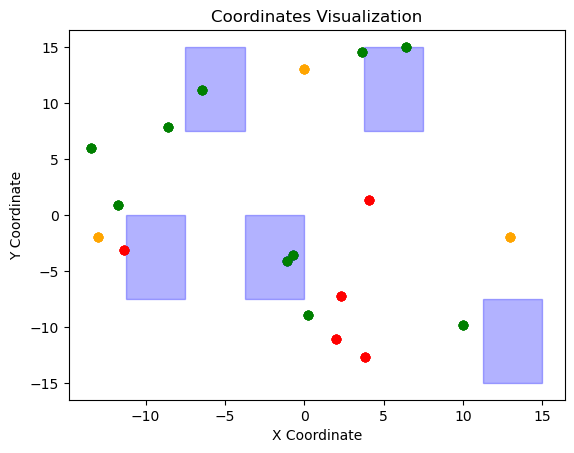

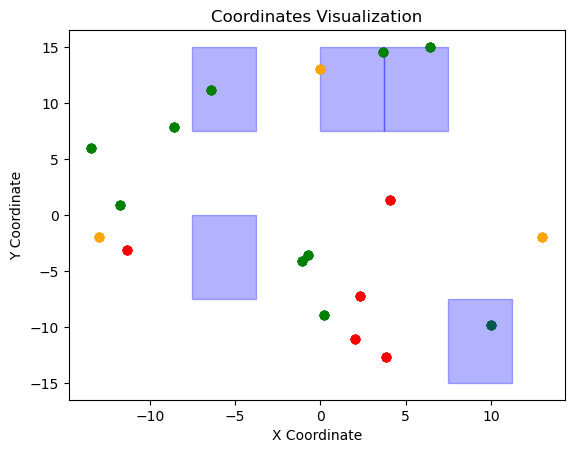

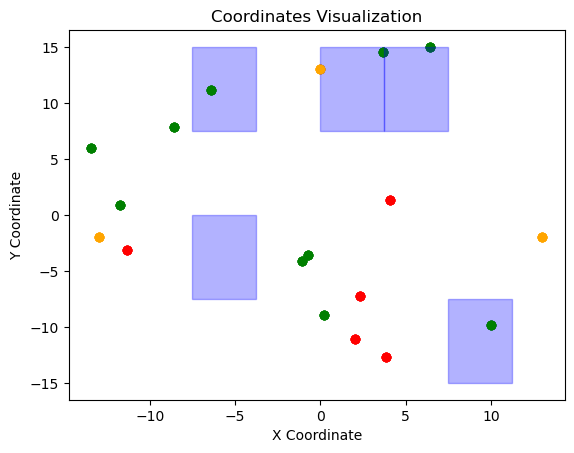

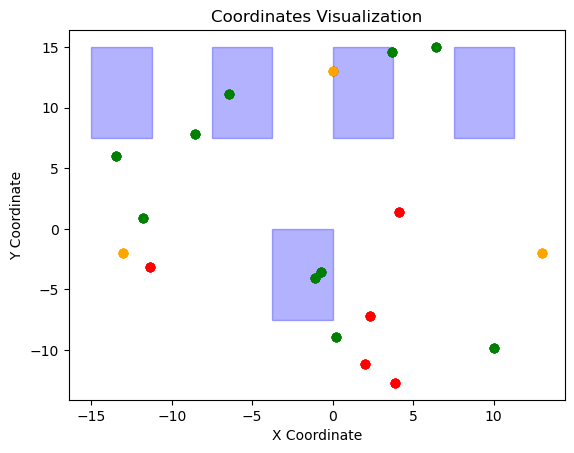

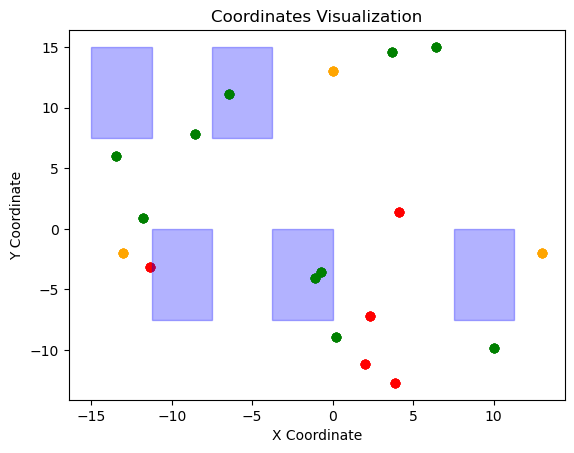

In [23]:
import matplotlib.pyplot as plt


# Plot the new areas from final_set
for _ in Possible_Coordinates:
    for i in (_):
        charging_x, charging_y = zip(*existing_charging_points)
        interest_x, interest_y = zip(*points_of_interest)

        plt.scatter(charging_x, charging_y, color='red', label='Charging Points')
        plt.scatter(interest_x, interest_y, color='green', label='Points of Interest')
        plt.scatter(power_x, power_y, color='orange', label='Power Grids')
        x_start, x_end, y_start, y_end = boundaries[i]['x_start'], boundaries[i]['x_end'], boundaries[i]['y_start'], boundaries[i]['y_end']
        width = x_end - x_start
        height = y_end - y_start
        rect = plt.Rectangle((x_start, y_start), width, height, alpha=0.3, color='blue')
        plt.gca().add_patch(rect)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Coordinates Visualization')

    #plt.legend()

    plt.show()
